Подключаем библиотеки

In [1]:
import gudhi as gd
import csv
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans
import math
import numpy as np
import networkx as nx
from IPython.display import clear_output
from mpl_toolkits.mplot3d import Axes3D

Импортируем данные по странам в формате csv. Подробнее о данных написано в отчете к КТ3

In [2]:
with open('./data.csv', newline='') as f:
    reader = csv.reader(f)
    data = list(reader)

Делаем данные непрерывными (удаляем первую строчку с названиями столбцов и столбец стран) и нормализуем:

In [3]:
data = data[1:]
my_points = []
for x in data:
    my_points.append(list(map(float, x[1:6])))
my_points = preprocessing.normalize(my_points).tolist()

Создаем альфа-комплекс по первым 30 точкам:

In [4]:
ac = gd.AlphaComplex(points = my_points[:30])
st = ac.create_simplex_tree()

Информация об альфа-фильтрации:

In [6]:
#result_str = 'Alpha complex is of dimension ' + repr(st.dimension()) + ' - ' + \
#    repr(st.num_simplices()) + ' simplices - ' + \
#    repr(st.num_vertices()) + ' vertices.'
# print(result_str)
#fmt = '%s -> %.2f'
#for filtered_value in st.get_filtration():
    # print(fmt % tuple(filtered_value))

Строим баркод:

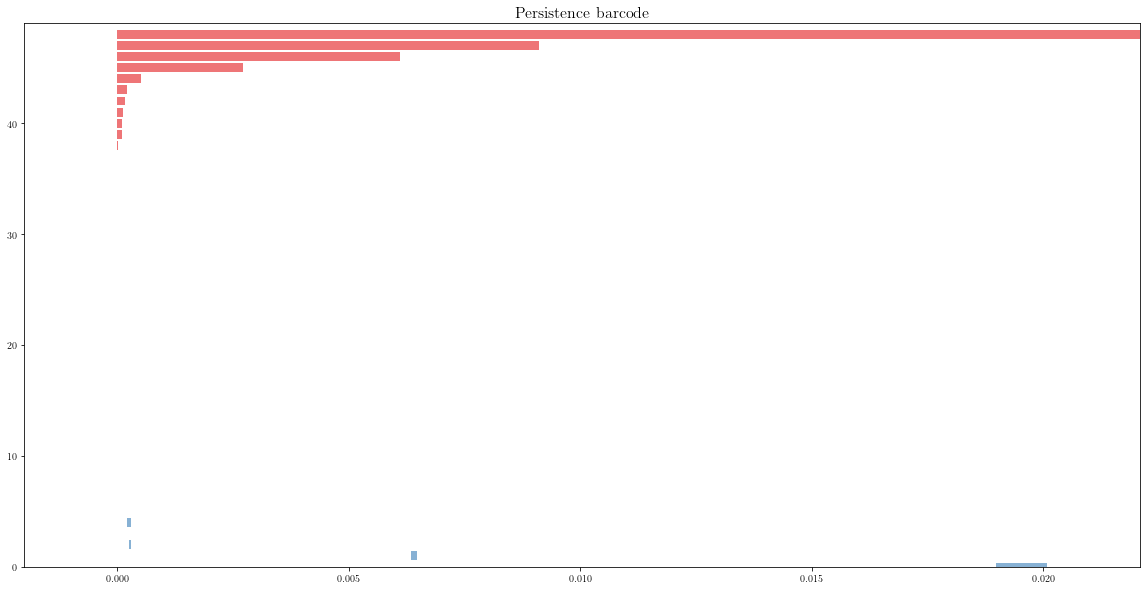

In [6]:
diag_alpha = st.persistence(min_persistence = 0.000000002)
gd.plot_persistence_barcode(diag_alpha)
plt.rc('figure', figsize=(20, 10))
plt.show()

Попробуем построить и получить информацию о комплексе Вьетора–Рипса (все как раньше), ограничившись 30 точчками:

In [7]:
rips_complex = gd.RipsComplex(points = my_points[:30])
simplex_tree = rips_complex.create_simplex_tree(max_dimension = 4)

In [ ]:
result_str = 'Rips complex is of dimension ' + repr(simplex_tree.dimension()) + ' - ' + \
    repr(simplex_tree.num_simplices()) + ' simplices - ' + \
    repr(simplex_tree.num_vertices()) + ' vertices.'
# print(result_str)
fmt = '%s -> %.2f'
for filtered_value in simplex_tree.get_filtration():
    # print(fmt % tuple(filtered_value))

Баркод:

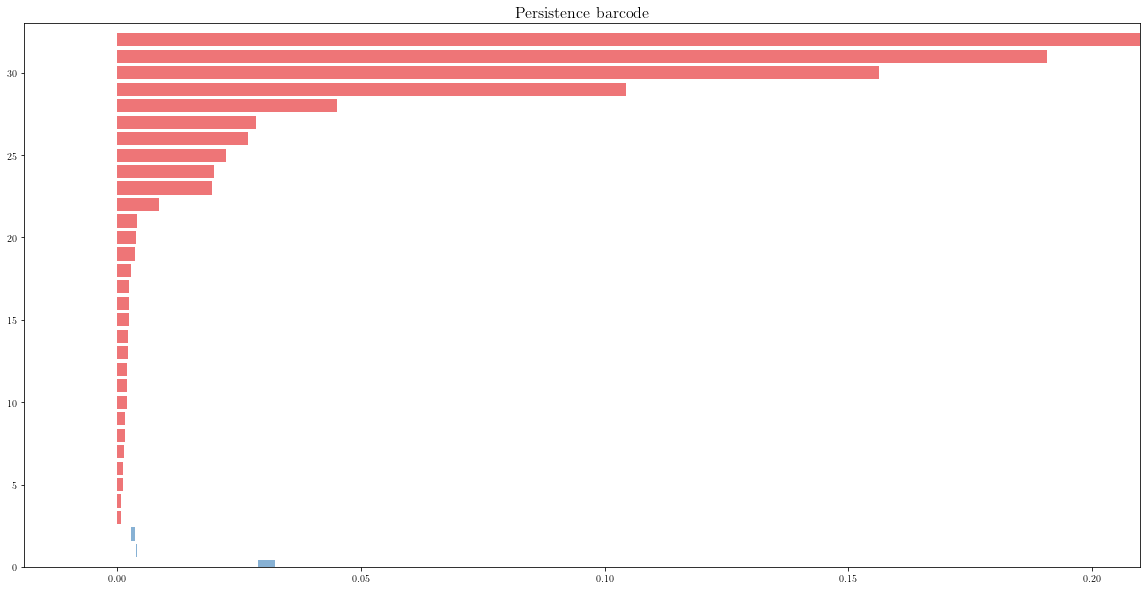

In [8]:
diag_rips = simplex_tree.persistence(min_persistence = 0)
gd.plot_persistence_barcode(diag_rips)
plt.rc('figure', figsize=(20, 10))
plt.show()

Как указано в документации gudhi, красным помечаются 0-гомологии $H_0$. Это свидетельствует о том, что данные разбиваются на несколько кластеров (поскольку 0-гомологии — это компоненты связности). Проверим это, разбив с помощью алгоритма k-means, данные на 4 кластера.

In [9]:
kmeans = KMeans(n_clusters = 4)
kmeans.fit(my_points)
print(kmeans.labels_)

[3 2 1 1 1 2 3 0 2 3 1 1 1 1 1 1 1 1 3 1 1 1 1 1 1 1 1 1 2 1 1 1 1 1 1 1 1
 3 1 1 1 1 0 1 0 2 1 1 2 1 1 1 3 3 1 1 3 1 1 1 1 1 3 1 1 3 1 1 1 1 1 3 1 1
 1 1 1 3 1 3]


Итак, действительно, данные хорошо разбиваются на кластеры, что и требовалось доказать.

Мы проанализировали данные по странам. Теперь построим баркоды альфа-фильтрации для хорошо изученных топологчиеских конструкций: тора и бутылки Клейна.

Для начала посемплируем точки с тора, для этого посмотрим его [параметризацию](https://en.wikipedia.org/wiki/Torus#Geometry) в $\mathbb{R}^3$. Посчитаем его гомологии и сверим поулченные результаты с теоретическими. Для этого положим $R = 1$. Теперь будем задавать различные $\theta, \varphi \in [0, 2\pi]$ и добавлять точки в массив.

In [10]:
torus = []

def torus_val(phi, psi):
    x = (2+np.cos(psi))*np.cos(phi)
    y = (2+np.cos(psi))*np.sin(phi)
    z = np.sin(psi)
    torus.append([x,y,z])

In [11]:
for x in range(100):
    for y in range(100):
        torus_val(x / 100, y / 100)

Теперь построим комплекс и посчитаем его гомологии.

In [12]:
torus_alpha_complex = gd.AlphaComplex(points = torus)
torus_st = torus_alpha_complex.create_simplex_tree()

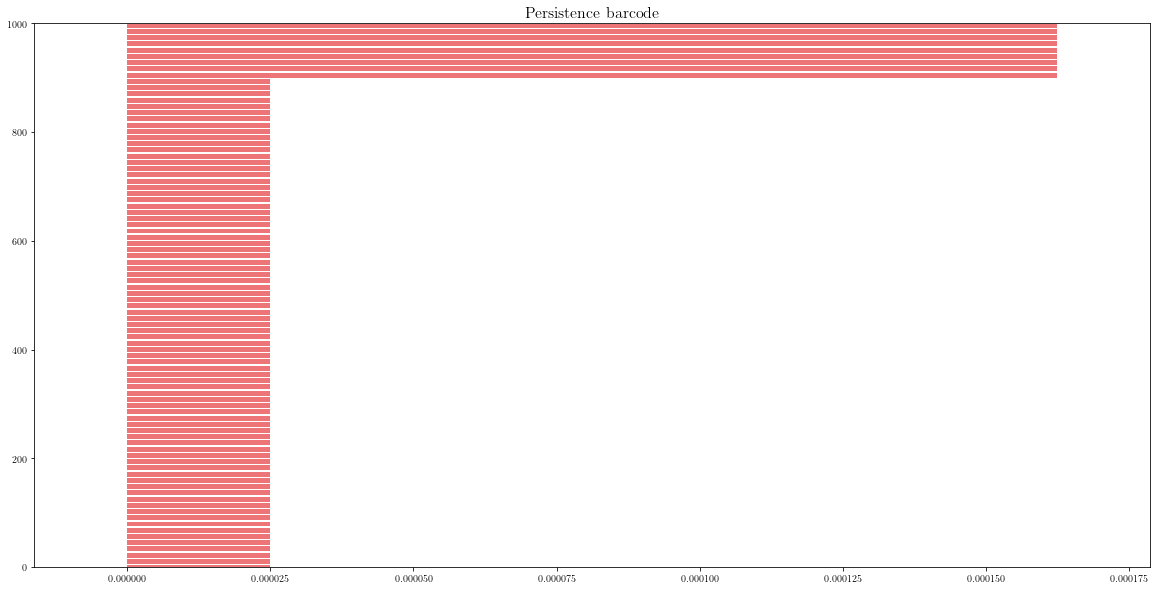

In [13]:
diag_torus = torus_st.persistence(min_persistence = 0.000000)
gd.plot_persistence_barcode(diag_torus)
plt.rc('figure', figsize=(20, 10))
plt.show()

Посемпилируем теперь точки с бутылки Клейна, восользовавшись его [параметризацией](https://en.wikipedia.org/wiki/Klein_bottle#4-D_non-intersecting) в $\mathbb{R}^4$. Для этого положим $R = 1, r = 0.75$. Теперь будем задавать различные $\theta, \varphi \in [0, 2\pi]$ и добавлять точки в массив.

In [14]:
klein_bottle = []

def klein(theta, phi):
    w = (1 + r * math.cos(theta)) * math.cos(phi),
    x = (1 + r * math.cos(theta)) * math.sin(phi),
    y = r * math.sin(theta) * math.cos(phi / 2),
    z = r * math.sin(theta) * math.sin(phi / 2)
    klein_bottle.append([float(w[0]), float(x[0]), float(y[0]), z])

In [15]:
r = 0.5

for x in range(100):
    for y in range(100):
        klein(x / 100, y / 100)

Теперь построим комплекс по 50 точкам и посчитаем его гомологии.

In [16]:
klein_alpha_complex = gd.AlphaComplex(points = klein_bottle[:50])
klein_st = klein_alpha_complex.create_simplex_tree()

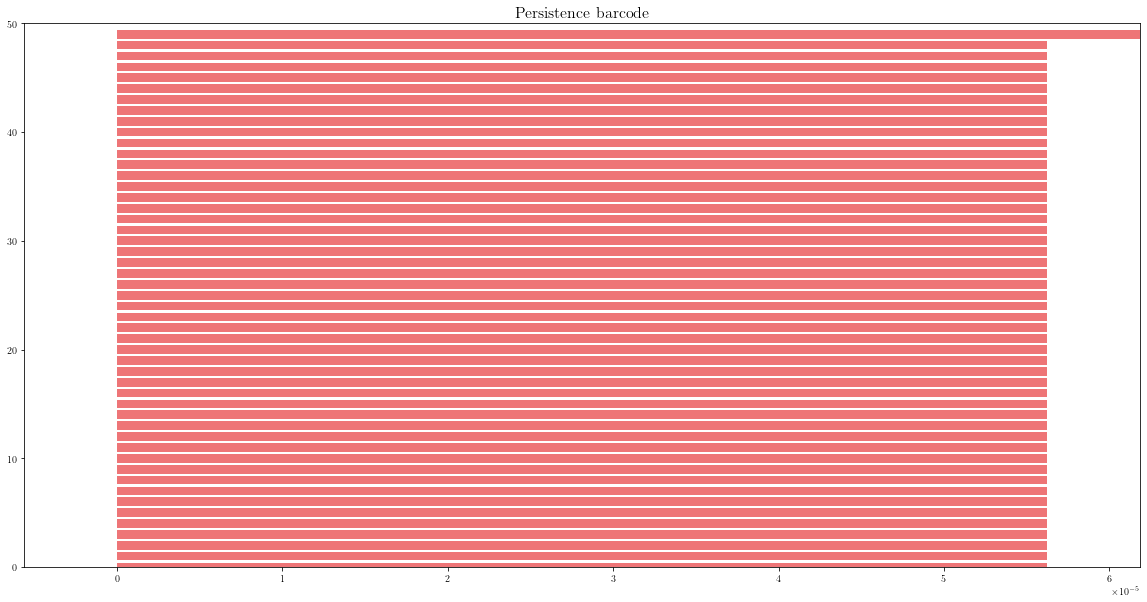

In [17]:
diag_klen = klein_st.persistence(min_persistence = 0.000002)
gd.plot_persistence_barcode(diag_klen)
plt.rc('figure', figsize=(20, 10))
plt.show()